# Линейная алгебра. Системы линейных уравнений#


## Умножение матриц

Визуализация умножения матриц: http://matrixmultiplication.xyz/

## Обратная матрица

Матрица $E_n$ размера $n \times n$ вида 
$$
E_n = \begin{pmatrix}
1 & 0 & 0 & \dots & 0 & 0 \\
0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 1 & 0 \\
0 & 0 & 0 & \dots & 0 & 1 \\
\end{pmatrix}
$$
называется единичной. 
Матрица $B$ (размера $n \times n$) называется обратной к матрице $A$ (размера $n \times n$), если 
$$
A \cdot B = B \cdot A = E_n
$$

In [1]:
import numpy as np

A = np.array([
    [1,1,2],
    [1,2,4],
    [2,2,0]
])
B = np.linalg.inv(A)
np.set_printoptions(suppress=True) #Не печатать числа в виде 1.11022302e-16
print(B)
C = A.dot(B)
print(C)

## Определитель матрицы 

Определителем квадратной матрицы $A$ размера $n \times n$ называется некоторое число, которое рассчитывается по всем элементам матрицы. На данном занятии нам не так важно, как конкретно это число надо находить. Достаточно лишь знать, что:

1) У всякой квадратной матрицы можно найти определитель - конкретное число.

2) Определитель можно найти при помощи np.linalg.det(A)

In [2]:
import numpy as np

A =  np.array([
    [1,0],
    [0,1]
])
print(np.linalg.det(A), np.linalg.det(np.linalg.inv(A))) # Определители исходной и обратной матрицы

A =  np.array([
    [1,1],
    [0,2]
])
print(np.linalg.det(A), np.linalg.det(np.linalg.inv(A))) # Определители исходной и обратной матрицы

A =  np.array([
    [1,1],
    [0.5,1]
])
print(np.linalg.det(A), np.linalg.det(np.linalg.inv(A))) # Определители исходной и обратной матрицы

A =  np.array([
    [2,-2],
    [3,2]
])
print(np.linalg.det(A), np.linalg.det(np.linalg.inv(A))) # Определители исходной и обратной матрицы

1.0 1.0
2.0 0.5
0.5 2.0
10.000000000000002 0.09999999999999998


## Задание 1

1) Как связаны определитель исходной и обратной матрицы?

¯\\_(ツ)_/¯

2) Сформулируйте критерий, когда обратная матрица существует в зависимости от значения ее определителя?

¯\\_(ツ)_/¯

## Построение прямой по двум точкам
Необходмо найти уравнение прямой вида 
$$
y = kx + l,
$$

которая проходит через две заданные точки $P_1=(x_1, y_1)$ и $P_2=(x_2, y_2)$.

Решаем систему урвнений вида:
$$
\left\{
\begin{matrix}
kx_1 + l = y_1 \\
kx_2 + l = y_2
\end{matrix}
\right.
$$

или в матричном виде:

$$
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1
\end{pmatrix}
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$$

Тогда решение можно найти в виде:
$$
\begin{pmatrix}
k \\
l
\end{pmatrix}
=
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1
\end{pmatrix}^{-1}
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$$

[[ 2.  1.]
 [-2.  1.]]
[0 4]


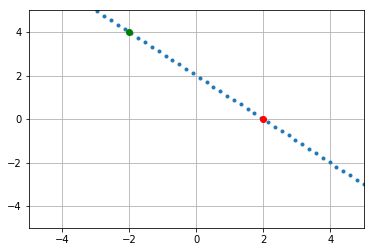

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def line_by_points(P1, P2):
    X = np.array([P1[0],P2[0]])
    Y = np.array([P1[1],P2[1]])
    A = np.vstack([X, np.ones(2)]).T # Склейка матриц
    print(A, Y, sep = '\n')
    
    K = np.linalg.solve(A,Y) 
    #K = np.linalg.inv(A).dot(Y) # В явном виде через обрантую матрицу
    # Замечание: Формально Y в обоих вариантах должен быть столбцом, а не строкой, но функции и так работают правильно.
    
    return K

P1 = [2,0]
P2 = [-2,4]
K = line_by_points(P1,P2)
x = np.linspace(-5,5) # Множество значений от -5 до +5 (с шагом 50 по умолчанию)
y = K[0]*x + K[1]
plt.plot(x,y, '.') # Строим график прямой
# plt.plot(x,y ) # Строим график прямой, соединяя точки
plt.plot(*P1,'ro') # Рисуем красную (r) точку (o)
plt.plot(*P2,'go') # Рисуем зеленую (g) точку (o)
plt.axis([-5, 5, -5, 5]) # Устанавливаем масштабы осей
plt.grid(True) # Отображаем сетку

## Задание 2
Для трех точек $P_1=(x_1, y_1)$, $P_2=(x_2, y_2)$ и $P_3=(x_3, y_3)$ постройте и нарисуйте прямые, которые проходят через каждую пару точек. Известно, что все $y_i$ различны.

In [4]:
# ¯\_(ツ)_/¯

## Точка пересечения прямых

Для двух прямых $y = k_1x + l_1$ и $y = k_2x + l_2$ необходимо найти точку их пересечения, т.е. решить систему 
$$
\left\{
\begin{matrix}
k_1x - y =  -l_1\\
k_2x - y = -l_2
\end{matrix}
\right.
$$
Запишем в матричном виде:
$$
\begin{pmatrix}
k_1 & -1 \\
k_2 & -1 
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
=
\begin{pmatrix}
-l_1 \\
-l_2
\end{pmatrix}
$$
Тогда решением будет:
$$
\begin{pmatrix}
x \\
y
\end{pmatrix}
=
\begin{pmatrix}
k_1 & -1 \\
k_2 & -1 
\end{pmatrix} ^{-1}
\begin{pmatrix}
-l_1 \\
-l_2
\end{pmatrix}
$$

[0.66666667 0.33333333]


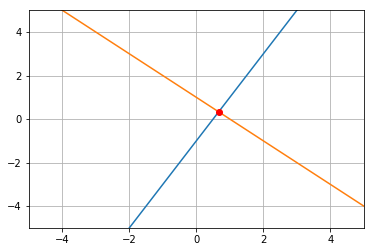

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def point_by_lines(R1, R2):
    K = np.array([R1[0],R2[0]])
    L = np.array([R1[1],R2[1]])
    A = np.vstack([K,-np.ones(2)]).T
    D = np.linalg.solve(A,-L)
    return D

    
R1 = [2,-1] # y = 2x - 1
R2 = [-1,1] # y = -x + 1


x = np.linspace(-5,5)
plt.plot(x,R1[0]*x + R1[1]);
plt.plot(x,R2[0]*x + R2[1]);

D  = point_by_lines(R1, R2)
print(D)
plt.plot(*D,'ro')

plt.axis([-5, 5, -5, 5]);
plt.grid(True)


## Задание 3
Для трех прямых $y = k_1x + l_1$, $y = k_2x + l_2$ и $y = k_3x + l_3$ необходимо найти все точки их пересечения, наприсовать прямые и точки. Известно, что прямые любые две прямые не параллельны

In [6]:
# ¯\_(ツ)_/¯

## Исследование семейства линейных уравнений (1)
Рассмотрим семейство систем линейных уравнений при $3 \leq n \leq 30$
$$
\left\{\begin{matrix}
x_1 + x_2 = 1 \\
x_2 + x_3 = 2 \\
... \\
x_{n-1} + x_{n} = n-1 \\
x_{n} + x_{1} = n \\
\end{matrix}\right.
$$

## Задание 4
1. Определение, при каких $n$ ($3 \leq n \leq 30$) данная система имеет решение. Указание: Если правая часть системы ненулевая, 
    т.е. не состоит из одних 0 (как в данном случае), то система имеет решение тогда и только тогда, 
    когда определитель матрицы не равен нулю.
2. Для максимального $n$, при котором система имеет решение, найдите решение и отобразите их на плоском графике как множество точек $(i, x_i)$
3. Проаналзируйте график и запишите множетсво решений в виде явной формулы.

In [7]:
n = 3
A = np.zeros((n,n))
B = np.array(range(1,n+1))
for i in range(n):
    pass # Заполнить матрцу А
# ¯\_(ツ)_/¯

1. Система имеет решение при $n$ - ...
2. Максимальное значение $n$ ($3 \leq n \leq 30$), при котором система имеет решение равно ...

Данное решение имеет вид:
$$
x_i = 
\left\{\begin{matrix}
..., \mbox{ если $i$ - ... } \\
..., \mbox{ если $i$ - ...} 
\end{matrix}
\right.
$$

[ 7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5
 21.5]
[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


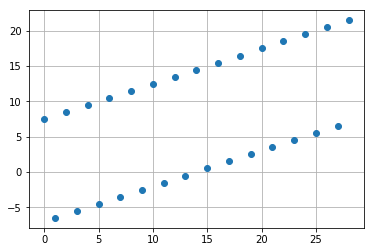

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_matrix(n):
    a = np.zeros((n,n))
    for i in range(n):
            a[i][i] = 1
            a[i][(i+1)%n] = 1
    return a

def test_det():
    for n in range(3,31):
        A = create_matrix(n)
        print(n, np.linalg.det(A))

def print_solution(n):
    assert n % 2 != 0
    A = create_matrix(n)
    B = np.array(range(1,n+1))
    X = np.linalg.solve(A,B)
    print(X[::2])
    print(X[1::2])
    plt.plot(X,'o');
    plt.grid(True);

print_solution(29)

$$
x_i = 
\left\{\begin{matrix}
7 + 0.5 \cdot i, \mbox{ если $i$ - нечетно}\\
-7.5 + 0.5 \cdot i, \mbox{ если $i$ - четно}\\
\end{matrix}
\right.
$$

## Задание 5
Проведите аналогичное исследование для семейства систем линейных уравнений при $3 \leq n \leq 30$
$$
\left\{\begin{matrix}
x_1 + x_2 + x_3= 1 \\
x_2 + x_3 + x_4= 2 \\
... \\
x_{n-2} + x_{n-1} + x_{n}= n-2 \\
x_{n-1} + x_{n} + x_{1}= n-1 \\
x_{n} + x_{1} + x_{2}= n \\
\end{matrix}\right.
$$